In [1]:
def load_model_sum(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "list_model_sum.pt"))

def load_R2SP_sum(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "R2SP_client_sum.pt"))

def load_server_to_client_sum(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "sever_to_client_sum.pt"))

def load_client_loss(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "list_client_loss.pt"))

def load_client_acc(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "list_client_acc.pt"))

def load_client_size(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "list_model_size.pt"))

def load_client_time(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "self.list_client_time.pt"))


def load_acc(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "self.list_acc.pt"))

def load_time(exp, cs=False):
    print(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "self.time"))
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "self.time"))


def load_ms(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "model_size.pt"))

def load_fed_avg_acc(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "fed_avg_acc.pt"))

def load_fed_avg_loss(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "fed_avg_loss.pt"))

def load_model_G(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "model_G.pt"))



%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
# Create data
import numpy as np
import os
from os.path import join
import matplotlib.pyplot as plt
from itertools import product
from utils.save_load import load



if os.getcwd().startswith('/mnt/sda1/mcj/PruneFL-master/PruneFL-master'):
    os.chdir('/mnt/sda1/mcj/PruneFL-master/PruneFL-master')

if os.getcwd().startswith("/data/mcj/Prune_fl"):
    os.chdir("/data/mcj/Prune_fl")

dataset_name = "MNIST"
import configs.mnist as config
client_sel = False
time_lim = (-1000, 60000)
acc_lim = (0.0, 0.9)
lottery_ticket_acc_lim = (0.7, 0.9)
n = 10

result_path = join("results", config.EXP_NAME)
if not os.path.isdir(f"results/{config.EXP_NAME}/figs"):
    os.makedirs(f"results/{config.EXP_NAME}/figs")
fig_path = join(result_path, "figs")

In [2]:
import os
os.listdir(result_path)

['PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.1__asyn__recover_polybuff_mask_fed_avg_Resdiual_niid__n__10_____esc',
 'PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.1__asyn__recover_polyfed_avg_Resdiual_niid__n__10_____esc',
 'figs',
 'PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.1__asyn__recover_polybuff_mask_fed_avg_niid__n__10_____esc',
 'PIF_MNIST_[1.0, 0.6, 0.3, 0.1]1.0__asyn__recover_polyfedfix_niid__n__10_____esc',
 'PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.1__asyn__polybuff_mask_fed_avg_Resdiual_niid__n__10_____esc',
 'PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.1__asyn__recover_polymask_fed_avg_Resdiual_niid__n__10_____esc',
 'PIF_MNIST_[1.0, 0.6, 0.3, 0.1]1.0__recover_polyfed_avg_niid__n__10_____esc',
 'PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.1__recover_polybuff_mask_fed_avg_Resdiual_niid__n__10_____esc',
 'PIF_MNIST_[1.0, 0.6, 0.3, 0.1]1.0__asyn__recover_polyfedasyn_niid__n__10_____esc',
 'PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.1__polyheterofl_niid__n__10_____esc']

In [3]:
exp = [
'PIF_MNIST_[1.0, 0.6, 0.3, 0.1]1.0__recover_polyfed_avg_niid__n__10_____esc',
'PIF_MNIST_[1.0, 0.6, 0.3, 0.1]1.0__asyn__recover_polyfedasyn_niid__n__10_____esc',
'PIF_MNIST_[1.0, 0.6, 0.3, 0.1]1.0__asyn__recover_polyfedfix_niid__n__10_____esc',
'PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.09__polyheterofl_niid__n__10_____esc',

'PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.09__asyn__recover_polybuff_mask_fed_avg_Resdiual_niid__n__10_____esc',




    

]


exp_legend = [    

    'FedAvg',
     'FedAsyn',
    'FedFIX',    
    'Hetero-fl',
    'PR-FL',

    
    
]

<IPython.core.display.Javascript object>


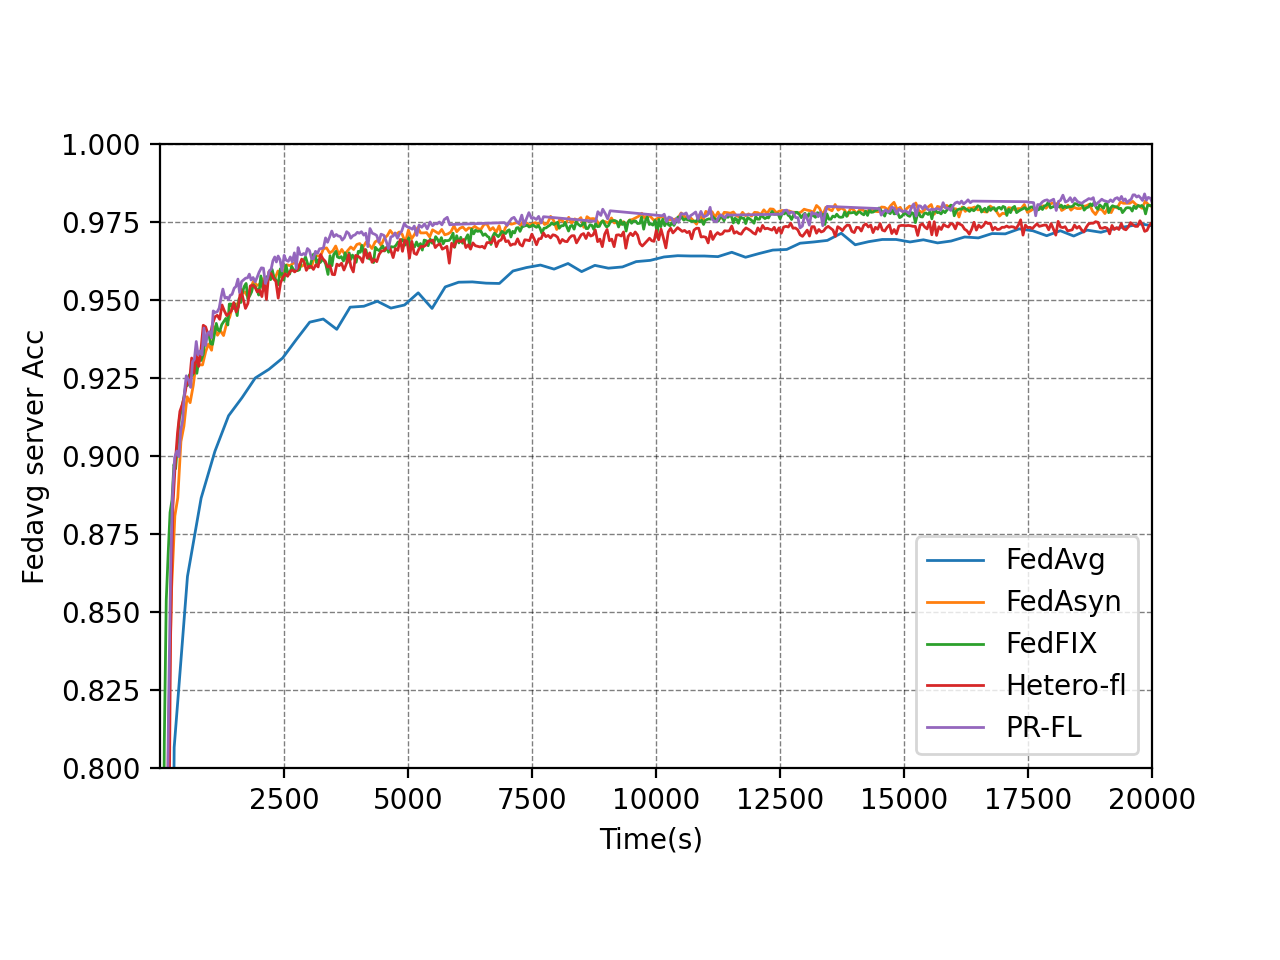

results/MNIST/PIF_MNIST_[1.0, 0.6, 0.3, 0.1]1.0__recover_polyfed_avg_niid__n__10_____esc/self.time
776 776
results/MNIST/PIF_MNIST_[1.0, 0.6, 0.3, 0.1]1.0__asyn__recover_polyfedasyn_niid__n__10_____esc/self.time
897 897
results/MNIST/PIF_MNIST_[1.0, 0.6, 0.3, 0.1]1.0__asyn__recover_polyfedfix_niid__n__10_____esc/self.time
1196 1196
results/MNIST/PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.09__polyheterofl_niid__n__10_____esc/self.time
667 667
results/MNIST/PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.09__asyn__recover_polybuff_mask_fed_avg_Resdiual_niid__n__10_____esc/self.time
975 975


In [4]:
plt.figure()

for i in range(len(exp)):
    exp_name = exp[i]
    try:
#         acc = load_acc(exp_name)
#         acc = np.convolve(acc, np.ones((n,)) / n, mode='valid')
        avg_acc = load_acc(exp_name)
        fed_avg_acc = load_fed_avg_acc(exp_name)
    
#         avg_acc = np.convolve(avg_acc, np.ones((n,)) / n, mode='valid')
        
        
            
        time = load_time(exp_name)
#         time = range(0,len(time)*50,50)


        print(len(time),len(avg_acc))
#         plt.plot(time, acc, linewidth=1, label=exp_legend[i])
#         plt.plot(time,avg_acc, linewidth=1, label=exp_legend[i])
        plt.plot(time,fed_avg_acc, linewidth=1, label=exp_legend[i])
        
    except FileNotFoundError:
        print(f"Skipping training results for {dataset_name}, {exp_name}. Client selection = {client_sel}.")
plt.xlabel(r"Time(s) ")
plt.ylabel("Fedavg server Acc")
plt.xlim([1,20000])
plt.ylim([0.8,1.0])

plt.legend(exp_legend,frameon=False, loc="center right",fontsize='small',ncol=3)
        
        

# Get the current axes and legend
ax = plt.gca()
legend = ax.legend()


# Function to handle legend click event
def on_legend_click(event):
    legline = event.artist
    origline = legline._orig_artist
    vis = not origline.get_visible()
    origline.set_visible(vis)
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    plt.draw()


# Connect the event handler to the legend
for legline, origline in zip(legend.get_lines(), ax.lines):
    legline.set_picker(True)
    legline._orig_artist = origline
    origline.set_visible(False)
    legline.set_alpha(0.2)# Set all lines to be initially hidden

plt.gcf().canvas.mpl_connect('pick_event', on_legend_click)


# 调整子图之间的间距和图形的大小
plt.subplots_adjust(top=0.85, bottom=0.2)
 
# Show the plot
plt.grid(linestyle="--", color='black', lw='0.5', alpha=0.5)
plt.show()

result_path = join("results", config.EXP_NAME)
if not os.path.isdir(f"results/{config.EXP_NAME}/figs"):
    os.makedirs(f"results/{config.EXP_NAME}/figs")
fig_path = join(result_path, "figs")
plt.savefig(join(fig_path, "FR-FL".format("_cs" if client_sel else "")), dpi=300)

In [56]:
exp = [


'PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.09__asyn__recover_polybuff_mask_fed_avg_Resdiual_niid__n__10_____esc',

'PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.09__recover_polybuff_mask_fed_avg_Resdiual_niid__n__10_____esc',
'PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.09__asyn__recover_polymask_fed_avg_Resdiual_niid__n__10_____esc',
'PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.09__asyn__recover_polybuff_mask_fed_avg_niid__n__10_____esc',
'PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.09__asyn__polybuff_mask_fed_avg_Resdiual_niid__n__10_____esc',
'PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.09__asyn__recover_polyfed_avg_Resdiual_niid__n__10_____esc',
]


exp_legend = [    

    'PR-FL',
    'syn-PR-FL',
    'nobuff-PR-FL',
    'noRes-PR-FL',
    'noRecovr-PR-FL',
    'fedavg-PR-FL',
    
]

<IPython.core.display.Javascript object>


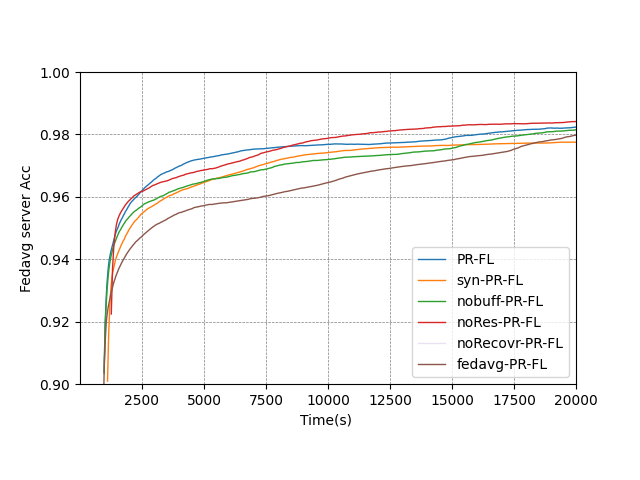

results/MNIST/PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.09__asyn__recover_polybuff_mask_fed_avg_Resdiual_niid__n__10_____esc/self.time
926 975
results/MNIST/PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.09__recover_polybuff_mask_fed_avg_Resdiual_niid__n__10_____esc/self.time
658 975
results/MNIST/PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.09__asyn__recover_polymask_fed_avg_Resdiual_niid__n__10_____esc/self.time
849 975
results/MNIST/PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.09__asyn__recover_polybuff_mask_fed_avg_niid__n__10_____esc/self.time
663 975
results/MNIST/PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.09__asyn__polybuff_mask_fed_avg_Resdiual_niid__n__10_____esc/self.time
989 975
results/MNIST/PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.09__asyn__recover_polyfed_avg_Resdiual_niid__n__10_____esc/self.time
1054 975


In [57]:
plt.figure()

for i in range(len(exp)):
    exp_name = exp[i]
    try:
#         acc = load_acc(exp_name)
#         acc = np.convolve(acc, np.ones((n,)) / n, mode='valid')
#         avg_acc = load_acc(exp_name)
        fed_avg_acc = load_fed_avg_acc(exp_name)
        fed_avg_acc = np.convolve(fed_avg_acc, np.ones((n,)) / n, mode='valid')
        time = load_time(exp_name)
        time = np.convolve(time, np.ones((n,)) / n, mode='valid')

#         time = range(0,len(time)*50,50)


        print(len(time),len(avg_acc))
#         plt.plot(time, acc, linewidth=1, label=exp_legend[i])
#         plt.plot(time,avg_acc, linewidth=1, label=exp_legend[i])
        plt.plot(time,fed_avg_acc, linewidth=1, label=exp_legend[i])
        
    except FileNotFoundError:
        print(f"Skipping training results for {dataset_name}, {exp_name}. Client selection = {client_sel}.")
plt.xlabel(r"Time(s) ")
plt.ylabel("Fedavg server Acc")
plt.xlim([1,20000])
plt.ylim([0.9,1.0])

plt.legend(exp_legend,frameon=False, loc="center right",fontsize='small',ncol=3)
        
        

# Get the current axes and legend
ax = plt.gca()
legend = ax.legend()


# Function to handle legend click event
def on_legend_click(event):
    legline = event.artist
    origline = legline._orig_artist
    vis = not origline.get_visible()
    origline.set_visible(vis)
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    plt.draw()


# Connect the event handler to the legend
for legline, origline in zip(legend.get_lines(), ax.lines):
    legline.set_picker(True)
    legline._orig_artist = origline
    origline.set_visible(False)
    legline.set_alpha(0.2)# Set all lines to be initially hidden

plt.gcf().canvas.mpl_connect('pick_event', on_legend_click)


# 调整子图之间的间距和图形的大小
plt.subplots_adjust(top=0.85, bottom=0.2)
 
# Show the plot
plt.grid(linestyle="--", color='black', lw='0.5', alpha=0.5)
plt.show()

result_path = join("results", config.EXP_NAME)
if not os.path.isdir(f"results/{config.EXP_NAME}/figs"):
    os.makedirs(f"results/{config.EXP_NAME}/figs")
fig_path = join(result_path, "figs")
plt.savefig(join(fig_path, "FR-FL".format("_cs" if client_sel else "")), dpi=300)

<IPython.core.display.Javascript object>


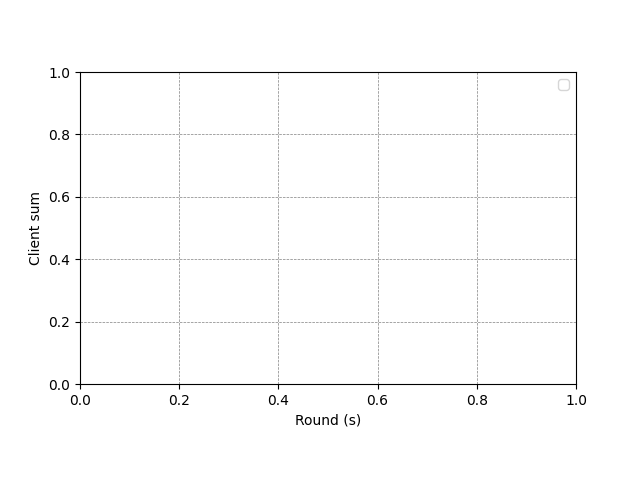

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Skipping training results for MNIST, PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.1__asyn__recover_polybuff_mask_fed_avg_Resdiual_niid__n__10_____esc. Client selection = False.
Skipping training results for MNIST, PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.1__recover_polybuff_mask_fed_avg_Resdiual_niid__n__10_____esc. Client selection = False.
Skipping training results for MNIST, PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.1__asyn__recover_polymask_fed_avg_Resdiual_niid__n__10_____esc. Client selection = False.
Skipping training results for MNIST, PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.1__asyn__recover_polybuff_mask_fed_avg_niid__n__10_____esc. Client selection = False.
Skipping training results for MNIST, PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.1__asyn__polybuff_mask_fed_avg_Resdiual_niid__n__10_____esc. Client selection = False.
Skipping training results for MNIST, PIF_MNIST_[1.0, 0.6, 0.3, 0.1]0.1__asyn__recover_polyfed_avg_Resdiual_niid__n__10_____esc. Client selection = False.


In [50]:
plt.figure()

for i in range(len(exp)):
    exp_name = exp[i]
    try:
        client_sum = load_model_sum(exp_name)
        client_sum = [[s.cpu().numpy() for s in cs] for cs in client_sum]

        client_acc = np.array(client_sum) 

        for col in range(0,10,4):
            plt.plot(client_acc[:, col], label='c_s_'+str(exp_legend[i])+f'Column {col+1}')
    
    
    except FileNotFoundError:
        print(f"Skipping training results for {dataset_name}, {exp_name}. Client selection = {client_sel}.")

plt.xlabel(r"Round (s)")
plt.ylabel("Client sum")

plt.legend(exp_legend,frameon=False, loc="center right",fontsize='small',ncol=3)
        
        

# Get the current axes and legend
ax = plt.gca()
legend = ax.legend()


# Function to handle legend click event
def on_legend_click(event):
    legline = event.artist
    origline = legline._orig_artist
    vis = not origline.get_visible()
    origline.set_visible(vis)
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    plt.draw()


# Connect the event handler to the legend
for legline, origline in zip(legend.get_lines(), ax.lines):
    legline.set_picker(True)
    legline._orig_artist = origline
    origline.set_visible(False)
    legline.set_alpha(0.2)# Set all lines to be initially hidden

plt.gcf().canvas.mpl_connect('pick_event', on_legend_click)



# 调整子图之间的间距和图形的大小
plt.subplots_adjust(top=0.85, bottom=0.2)
 
# Show the plot
plt.grid(linestyle="--", color='black', lw='0.5', alpha=0.5)
plt.show()


In [55]:
exp = [ 'Hetero_FL——[Hetero_fair_cuda20000_lrdecay_finetune1000]_[1, 0.5, 0.1]un_fair_1.0_1_no_increase_-1.0_fed_avg_g_0.0_0.0',
       'Hetero_FL——[Hetero_fair_cuda20000_lrdecay_finetune1000]_[1, 0.5, 0.1]un_fair_1.0_30_no_increase_-1.0_sub_fed_avg_g_0.0_0.0',
       'Hetero_FL——[Hetero_fair_cuda20000_lrdecay_finetune1000]_[1, 0.5, 0.1]un_fair_1.0_1_no_increase_-1.0_R2SP_g_0.0_0.0',
       

      
      ]
exp_legend = [ 'fed_avg',
             'sub_fed_avg',
             'R2SP']


<IPython.core.display.Javascript object>


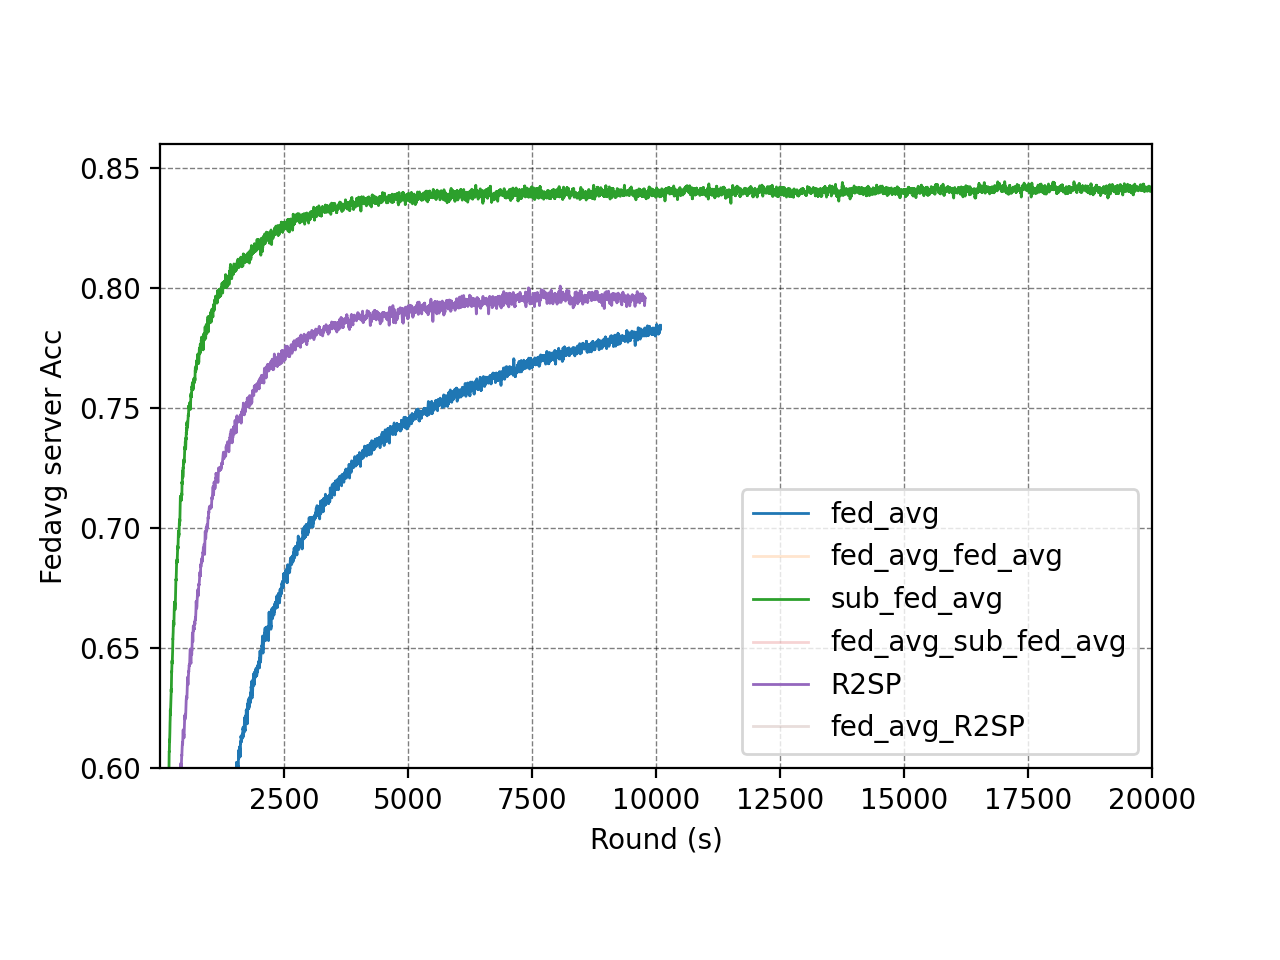

In [58]:
plt.figure()
n=10
for i in range(len(exp)):
    exp_name = exp[i]
    try:
        acc = load_acc(exp_name)
        acc = np.convolve(acc, np.ones((n,)) / n, mode='valid')
        avg_acc = load_fed_avg_acc(exp_name)
        avg_acc = np.convolve(avg_acc, np.ones((n,)) / n, mode='valid')
        time = range(0, len(acc))
        if exp_name == 'adaptive':
            time = range(0, len(acc) * 10, 10)
        plt.plot(time, acc, linewidth=1, label=exp_legend[i])
        plt.plot(time, avg_acc, linewidth=1, label='fed_avg_'+exp_legend[i])
        
    except FileNotFoundError:
        print(f"Skipping training results for {dataset_name}, {exp_name}. Client selection = {client_sel}.")
plt.xlabel(r"Round (s)")
plt.ylabel("Fedavg server Acc")
plt.xlim([1,20000])
plt.ylim([0.60,0.86])

plt.legend(exp_legend,frameon=False, loc="center right",fontsize='small',ncol=3)
        
        

# Get the current axes and legend
ax = plt.gca()
legend = ax.legend()


# Function to handle legend click event
def on_legend_click(event):
    legline = event.artist
    origline = legline._orig_artist
    vis = not origline.get_visible()
    origline.set_visible(vis)
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    plt.draw()


# Connect the event handler to the legend
for legline, origline in zip(legend.get_lines(), ax.lines):
    legline.set_picker(True)
    legline._orig_artist = origline
    origline.set_visible(False)
    legline.set_alpha(0.2)# Set all lines to be initially hidden

plt.gcf().canvas.mpl_connect('pick_event', on_legend_click)



# 调整子图之间的间距和图形的大小
plt.subplots_adjust(top=0.85, bottom=0.2)
 
# Show the plot
plt.grid(linestyle="--", color='black', lw='0.5', alpha=0.5)
plt.show()


In [66]:
exp = [
     'Hetero_FL——[Hetero_fair_cuda20000_smalltobig]_[1, 0.5, 0.1]un_fair_1.0_1_no_increase_-1.0_sub_fed_avg_g_0.0_0.1',
'Hetero_FL——[Hetero_fair_cuda20000_bigtosmall]_[1, 0.5, 0.1]un_fair_1.0_1_no_increase_-1.0_sub_fed_avg_g_0.0_0.1']


exp_legend = ['1,1,1',
              '1,1,1',

]




<IPython.core.display.Javascript object>


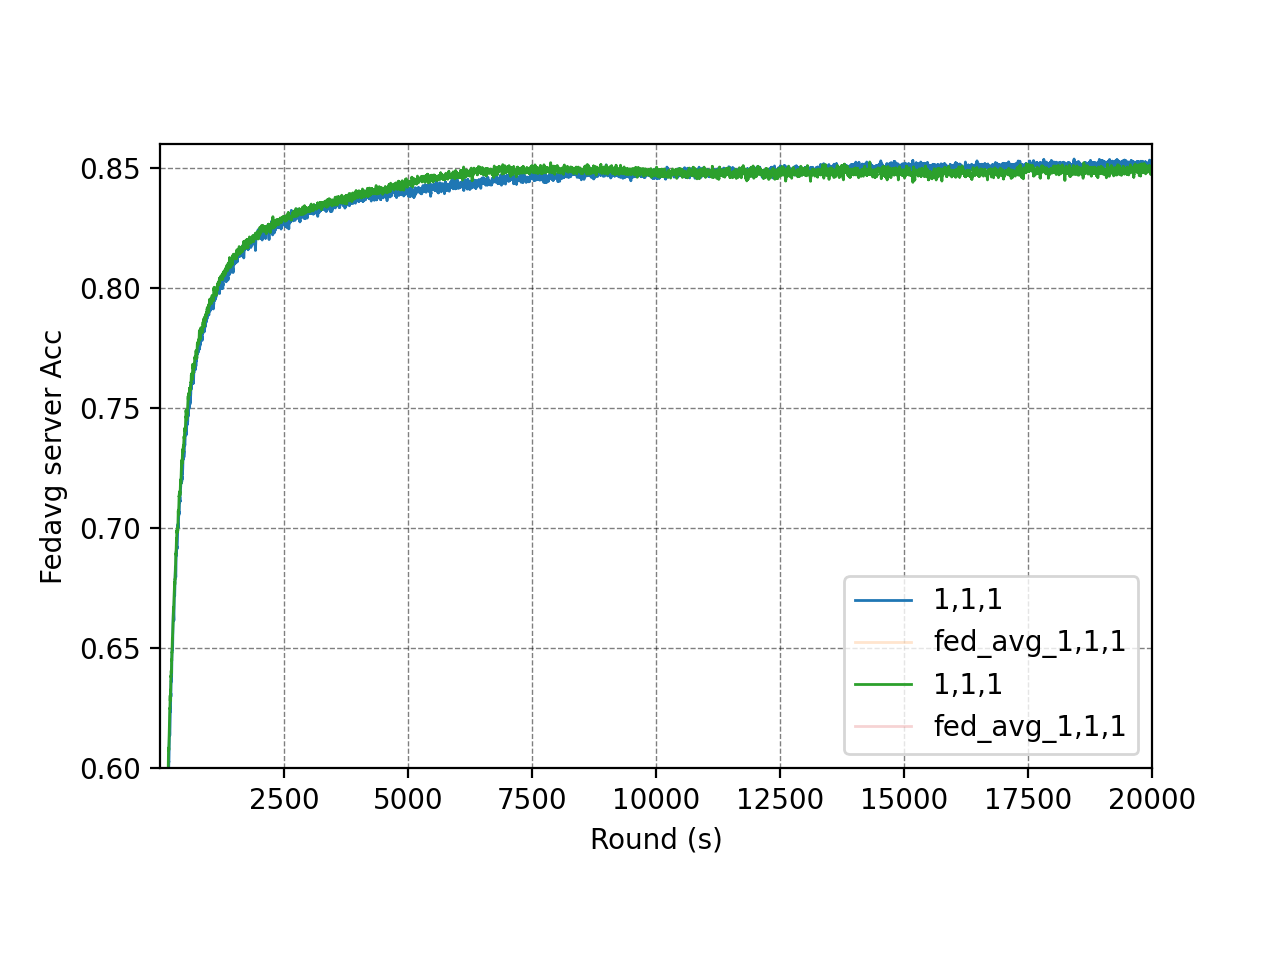

In [68]:
plt.figure()
n=10
for i in range(len(exp)):
    exp_name = exp[i]
    try:
        acc = load_acc(exp_name)
        acc = np.convolve(acc, np.ones((n,)) / n, mode='valid')
        avg_acc = load_fed_avg_acc(exp_name)
        avg_acc = np.convolve(avg_acc, np.ones((n,)) / n, mode='valid')
        time = range(0, len(acc))
        if exp_name == 'adaptive':
            time = range(0, len(acc) * 10, 10)
        plt.plot(time, acc, linewidth=1, label=exp_legend[i])
        plt.plot(time, avg_acc, linewidth=1, label='fed_avg_'+exp_legend[i])
        
    except FileNotFoundError:
        print(f"Skipping training results for {dataset_name}, {exp_name}. Client selection = {client_sel}.")
plt.xlabel(r"Round (s)")
plt.ylabel("Fedavg server Acc")
plt.xlim([1,20000])
plt.ylim([0.60,0.86])

plt.legend(exp_legend,frameon=False, loc="center right",fontsize='small',ncol=3)
        
        

# Get the current axes and legend
ax = plt.gca()
legend = ax.legend()


# Function to handle legend click event
def on_legend_click(event):
    legline = event.artist
    origline = legline._orig_artist
    vis = not origline.get_visible()
    origline.set_visible(vis)
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    plt.draw()


# Connect the event handler to the legend
for legline, origline in zip(legend.get_lines(), ax.lines):
    legline.set_picker(True)
    legline._orig_artist = origline
    origline.set_visible(False)
    legline.set_alpha(0.2)# Set all lines to be initially hidden

plt.gcf().canvas.mpl_connect('pick_event', on_legend_click)



# 调整子图之间的间距和图形的大小
plt.subplots_adjust(top=0.85, bottom=0.2)
 
# Show the plot
plt.grid(linestyle="--", color='black', lw='0.5', alpha=0.5)
plt.show()


In [243]:
#to plot server acc

In [248]:
exp = ['Hetero_FL——[Hetero_fair_cuda_(1,5,1)_10000_coeff_fed_avg_acc]unfair_1.0_1_no_increase_-1.0_sub_fed_avg'
]


exp_legend = ['1,5,1',
]

In [262]:
# how do different densities affect the model acc
exp = [
    'Hetero_FL——[Hetero_fair_cuda_(1,5,9)_10000_coeff_fed_avg_acc]unfair_1.0_1_no_increase_-1.0_sub_fed_avg',
       'Hetero_FL——[Hetero_fair_cuda_(1,5,93)_10000_coeff_round2]unfair_1.0_1_no_increase_-1.0_sub_fed_avg',
       'Hetero_FL——[Hetero_fair_cuda_(1,5,96)_10000_coeff_round2]unfair_1.0_1_no_increase_-1.0_sub_fed_avg',
       'Hetero_FL——[Hetero_fair_cuda_(1,5,98)_10000_coeff_round2]unfair_1.0_1_no_increase_-1.0_sub_fed_avg',

        'Hetero_FL——[Hetero_fair_cuda_(1,5,10)_10000_coeff_fed_avg_acc]unfair_1.0_1_no_increase_-1.0_sub_fed_avg',
       'Hetero_FL——[Hetero_fair_cuda_(1,1,0.1)_10000_coeff_fed_avg_acc]unfair_1.0_1_no_increase_-1.0_sub_fed_avg', 
    'Hetero_FL——[Hetero_fair_cuda_(1,1,1)_10000_coeff_fed_avg_acc]unfair_1.0_1_no_increase_-1.0_sub_fed_avg'
]


exp_legend = [
              '1,5,9',
    '1,5,93','1,5,96','1,5,98',
    '1,5,10',
              '1,1,0.1',
              '1,1,1',
]

In [41]:
exp = [
#     'adaptive',
 'Hetero_FL——[Hetero_fair_cuda]_[1, 0.5, 0.1]unfair_1.0_1_no_increase_1e-05_sub_fed_avg_g',
 'Hetero_FL——[Hetero_fair_cuda]_[1, 0.5, 0.6]unfair_1.0_1_no_increase_-1.0_sub_fed_avg_g',
#  'Hetero_FL——[Hetero_fair_cuda]_[1, 0.5, 0.1]unfair_1.0_1_no_increase_-1.0_R2SP_g',
 'Hetero_FL——[Hetero_fair_cuda]_[1, 0.5, 0.2]unfair_1.0_1_no_increase_-1.0_sub_fed_avg_sub_fed_avg',
 'Hetero_FL——[Hetero_fair_cuda]_[1, 0.5, 1.0]unfair_1.0_1_no_increase_-1.0_sub_fed_avg_g',
 'Hetero_FL——[Hetero_fair_cuda]_[1, 0.5, 0.1]n_-2.0_1_no_increase_-1.0_sub_fed_avg_g',
  'Hetero_FL——[Hetero_fair_cuda]_[1, 0.5, 0.1]unfair_1.0_1_no_increase_-1.0_fed_avg_w',
 'Hetero_FL——[Hetero_fair_cuda]_[1, 0.5, 0.1]u_1.0_1_no_increase_-1.0_sub_fed_avg_g',
#  'Hetero_FL——[Hetero_fair_cuda]_[1, 0.5, 0.4]unfair_1.0_1_no_increase_-1.0_sub_fed_avg_sub_fed_avg',
 'Hetero_FL——[Hetero_fair_cuda]_[1, 0.5, 0.1]u_-2.0_1_no_increase_-1.0_sub_fed_avg_g',
#  'Hetero_FL——[Hetero_fair_cuda]_[1, 0.5, 0.1]unfair_1.0_1_no_increase_-1.0_fed_avg_g',
#  'Hetero_FL——[Hetero_fair_cuda]_[1, 0.5, 0.8]unfair_1.0_1_no_increase_-1.0_sub_fed_avg_sub_fed_avg',
 'Hetero_FL——[Hetero_fair_cuda]_[1, 0.5, 0.1]n_1.0_1_no_increase_-1.0_sub_fed_avg_g',
 'Hetero_FL——[Hetero_fair_cuda]_[1, 0.5, 0.1]unfair_1.0_1_no_increase_-1.0_sub_fed_avg_sub_fed_avg']


exp_legend = [
#     [1,1,1],
 '[1, 0.5, 0.1]1e-05',
 '[1, 0.5, 0.6]',
#  '[1, 0.5, 0.1]R2SP_g',
    '[1, 0.5, 0.2]',
    '[1, 0.5, 1.0]',
    '[1, 0.5, 0.1]n_-2.0',
     '[1, 0.5, 0.1]w',
    '[1, 0.5, 0.1]u_1.0',
#     '[1, 0.5, 0.4]',
    '[1, 0.5, 0.1]u_-2.0',
#     '[1, 0.5, 0.1]_fed_avg',
#     '[1, 0.5, 0.8]',
    '[1, 0.5, 0.1]n_1',
    '[1, 0.5, 0.1]'
    ]





<IPython.core.display.Javascript object>


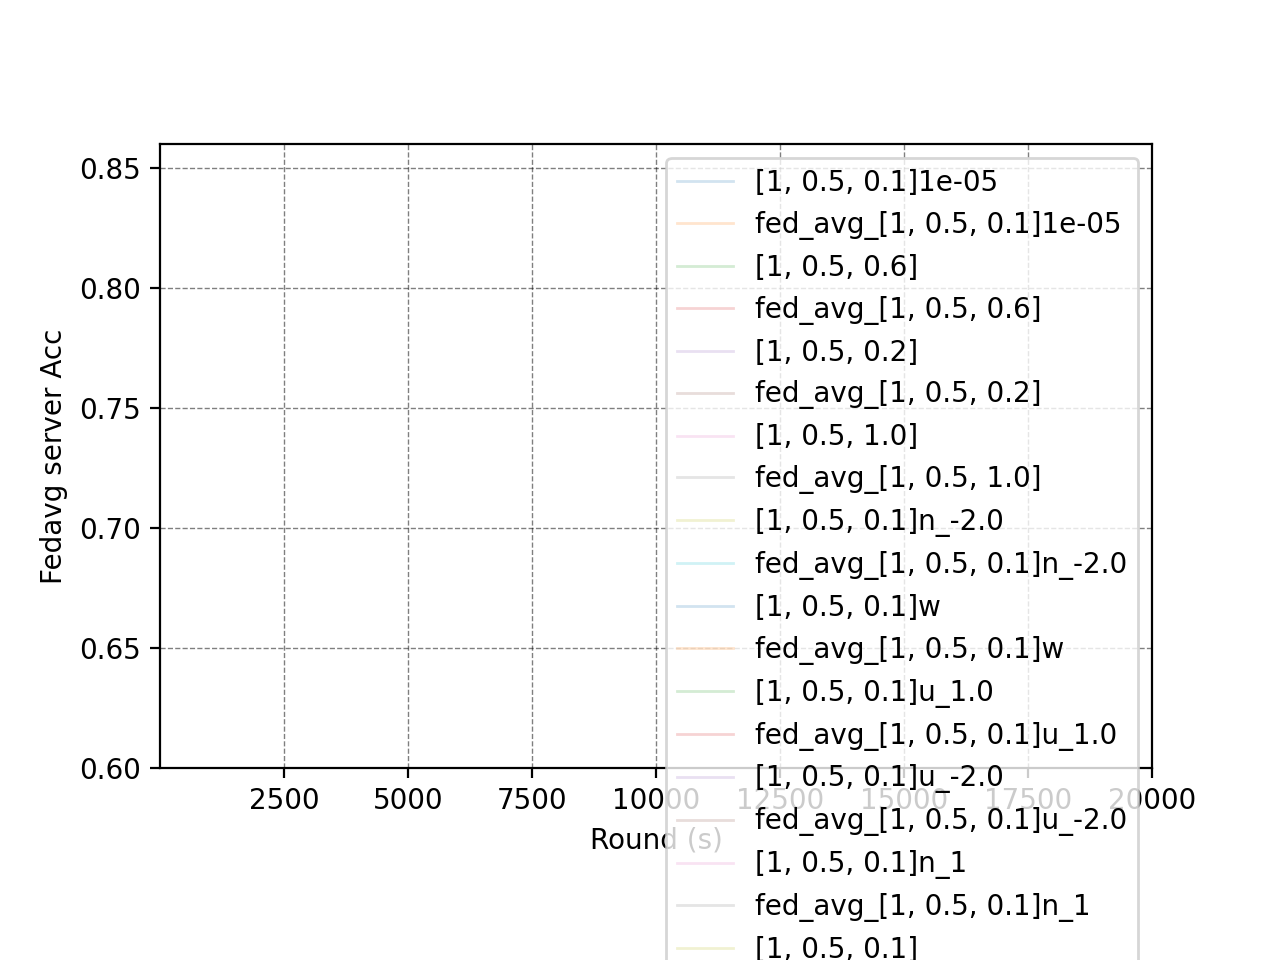

In [46]:
plt.figure()
n=10
for i in range(len(exp)):
    exp_name = exp[i]
    try:
        acc = load_acc(exp_name)
        acc = np.convolve(acc, np.ones((n,)) / n, mode='valid')
        avg_acc = load_fed_avg_acc(exp_name)
        avg_acc = np.convolve(avg_acc, np.ones((n,)) / n, mode='valid')
        time = range(0, len(acc))
        if exp_name == 'adaptive':
            time = range(0, len(acc) * 10, 10)
        plt.plot(time, acc, linewidth=1, label=exp_legend[i])
        plt.plot(time, avg_acc, linewidth=1, label='fed_avg_'+exp_legend[i])
        
    except FileNotFoundError:
        print(f"Skipping training results for {dataset_name}, {exp_name}. Client selection = {client_sel}.")
plt.xlabel(r"Round (s)")
plt.ylabel("Fedavg server Acc")
plt.xlim([1,20000])
plt.ylim([0.60,0.86])

plt.legend(exp_legend,frameon=False, loc="center right",fontsize='small',ncol=3)
        
        

# Get the current axes and legend
ax = plt.gca()
legend = ax.legend()


# Function to handle legend click event
def on_legend_click(event):
    legline = event.artist
    origline = legline._orig_artist
    vis = not origline.get_visible()
    origline.set_visible(vis)
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    plt.draw()


# Connect the event handler to the legend
for legline, origline in zip(legend.get_lines(), ax.lines):
    legline.set_picker(True)
    legline._orig_artist = origline
    origline.set_visible(False)
    legline.set_alpha(0.2)# Set all lines to be initially hidden

plt.gcf().canvas.mpl_connect('pick_event', on_legend_click)



# 调整子图之间的间距和图形的大小
plt.subplots_adjust(top=0.85, bottom=0.2)
 
# Show the plot
plt.grid(linestyle="--", color='black', lw='0.5', alpha=0.5)
plt.show()


<IPython.core.display.Javascript object>


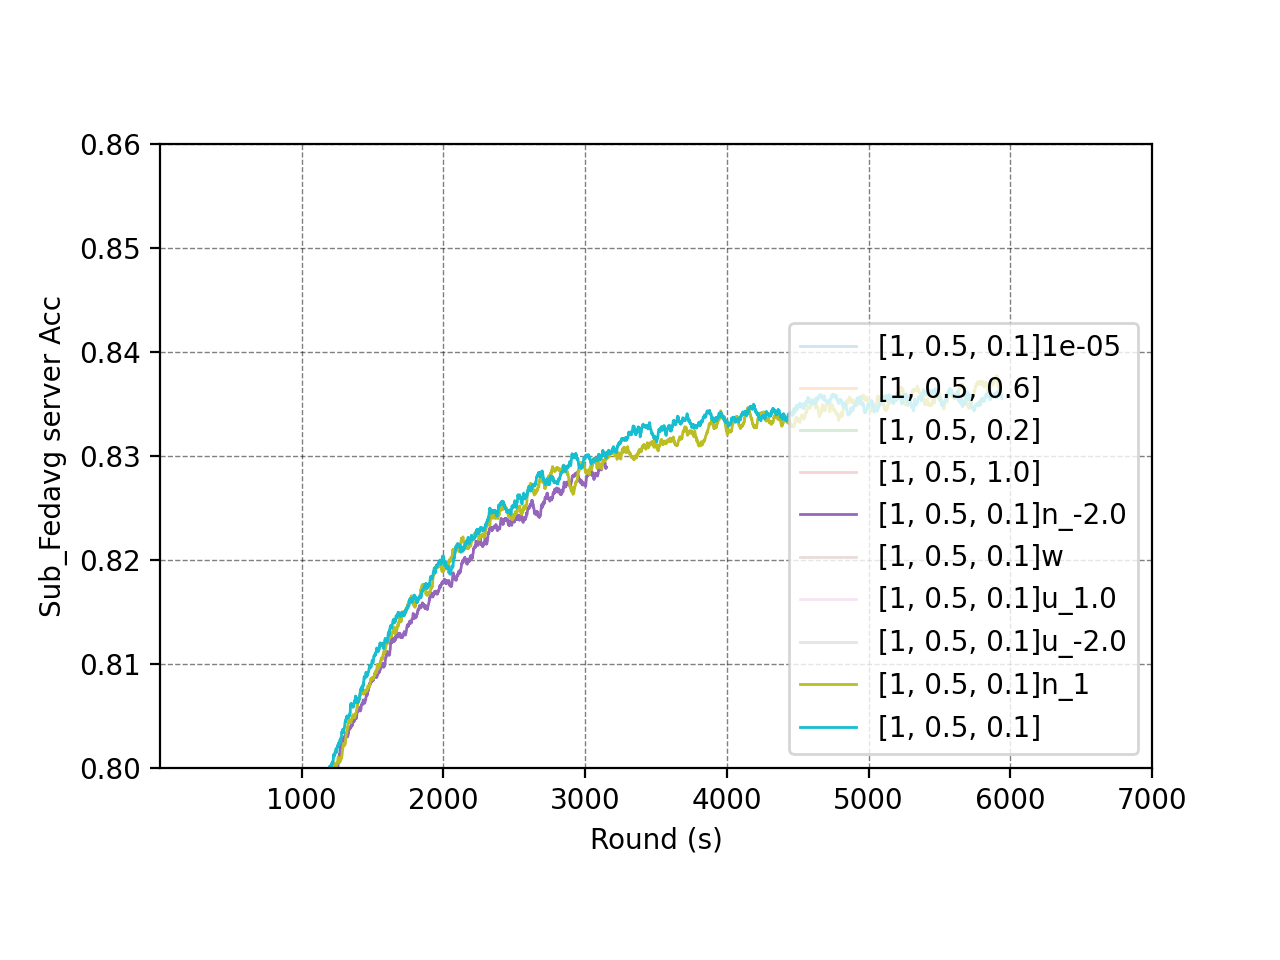

In [43]:
plt.figure()
n=50
for i in range(len(exp)):
    exp_name = exp[i]
    try:
        acc = load_acc(exp_name)
        acc = np.convolve(acc, np.ones((n,)) / n, mode='valid')
#         avg_acc = load_fed_avg_acc(exp_name)
#         avg_acc = np.convolve(avg_acc, np.ones((n,)) / n, mode='valid')
        time = range(0, len(acc))
        if exp_name == 'adaptive_prune'or exp_name == 'adaptive_fine_tune':
            time = range(0, len(acc) * 10, 10)
        plt.plot(time, acc, linewidth=1, label=exp_legend[i])
#         plt.plot(time, avg_acc, linewidth=1, label='fed_avg_'+exp_legend[i])
        
    except FileNotFoundError:
        print(f"Skipping training results for {dataset_name}, {exp_name}. Client selection = {client_sel}.")

plt.xlabel(r"Round (s)")
plt.ylabel("Sub_Fedavg server Acc")
plt.xlim([1,7000])
plt.ylim([0.80,0.86])

plt.legend(exp_legend,frameon=False, loc="center right",fontsize='small',ncol=3)
        
        

# Get the current axes and legend
ax = plt.gca()
legend = ax.legend()


# Function to handle legend click event
def on_legend_click(event):
    legline = event.artist
    origline = legline._orig_artist
    vis = not origline.get_visible()
    origline.set_visible(vis)
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    plt.draw()


# Connect the event handler to the legend
for legline, origline in zip(legend.get_lines(), ax.lines):
    legline.set_picker(True)
    legline._orig_artist = origline
    origline.set_visible(False)  # Set all lines to be initially hidden

plt.gcf().canvas.mpl_connect('pick_event', on_legend_click)



# 调整子图之间的间距和图形的大小
plt.subplots_adjust(top=0.85, bottom=0.2)
 
# Show the plot
plt.grid(linestyle="--", color='black', lw='0.5', alpha=0.5)
plt.show()


<IPython.core.display.Javascript object>


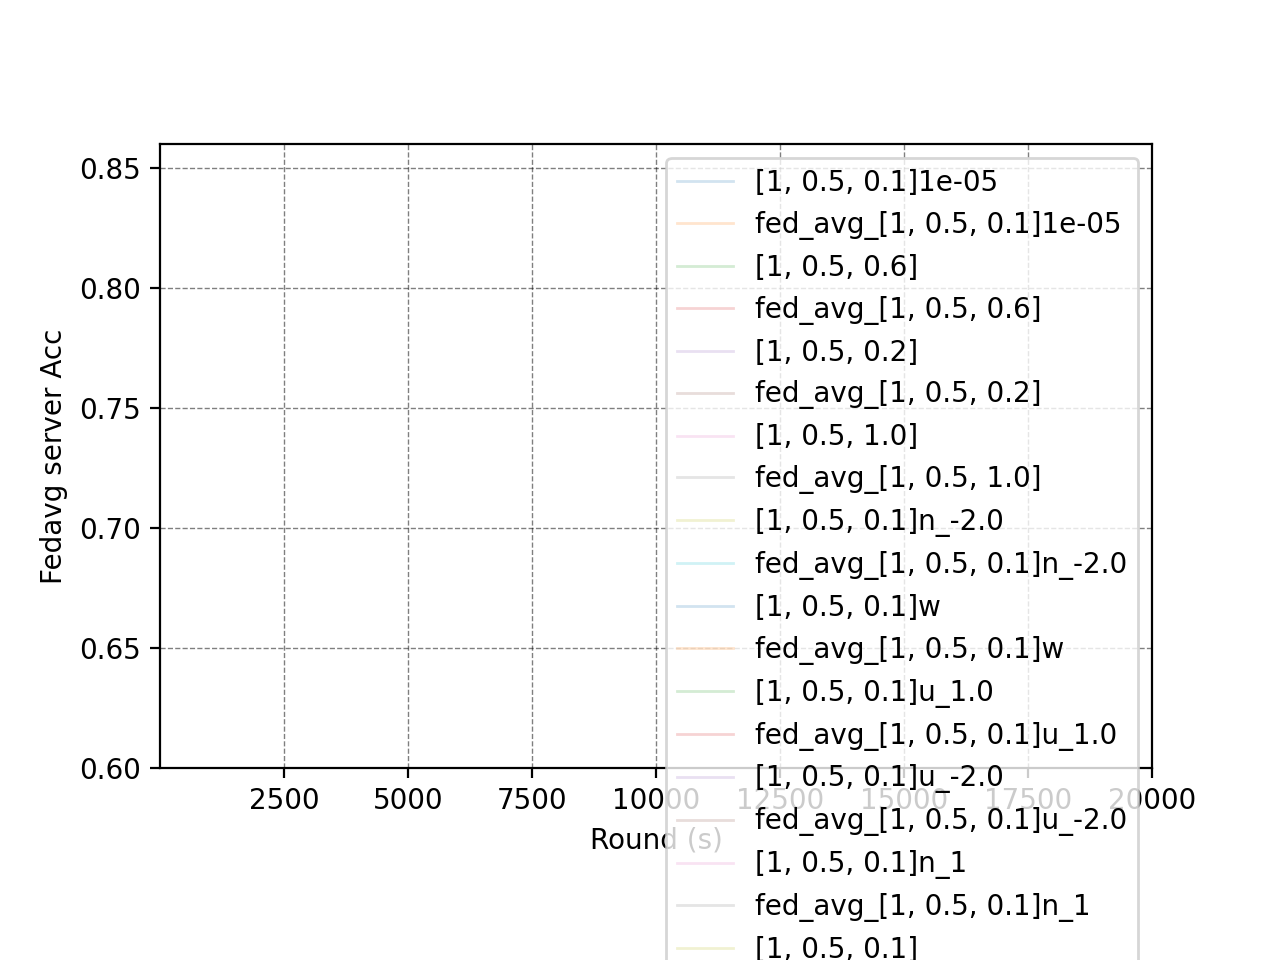

In [45]:
plt.figure()
n=10
for i in range(len(exp)):
    exp_name = exp[i]
    try:
        acc = load_acc(exp_name)
        acc = np.convolve(acc, np.ones((n,)) / n, mode='valid')
        avg_acc = load_fed_avg_acc(exp_name)
        avg_acc = np.convolve(avg_acc, np.ones((n,)) / n, mode='valid')
        time = range(0, len(acc))
        if exp_name == 'adaptive':
            time = range(0, len(acc) * 10, 10)
        plt.plot(time, acc, linewidth=1, label=exp_legend[i])
        plt.plot(time, avg_acc, linewidth=1, label='fed_avg_'+exp_legend[i])
        
    except FileNotFoundError:
        print(f"Skipping training results for {dataset_name}, {exp_name}. Client selection = {client_sel}.")
plt.xlabel(r"Round (s)")
plt.ylabel("Fedavg server Acc")
plt.xlim([1,20000])
plt.ylim([0.60,0.86])

plt.legend(exp_legend,frameon=False, loc="center right",fontsize='small',ncol=3)
        
        

# Get the current axes and legend
ax = plt.gca()
legend = ax.legend()


# Function to handle legend click event
def on_legend_click(event):
    legline = event.artist
    origline = legline._orig_artist
    vis = not origline.get_visible()
    origline.set_visible(vis)
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    plt.draw()


# Connect the event handler to the legend
for legline, origline in zip(legend.get_lines(), ax.lines):
    legline.set_picker(True)
    legline._orig_artist = origline
    origline.set_visible(False)
    legline.set_alpha(0.2)# Set all lines to be initially hidden

plt.gcf().canvas.mpl_connect('pick_event', on_legend_click)



# 调整子图之间的间距和图形的大小
plt.subplots_adjust(top=0.85, bottom=0.2)
 
# Show the plot
plt.grid(linestyle="--", color='black', lw='0.5', alpha=0.5)
plt.show()
